<a href="https://colab.research.google.com/github/qinliuliuqin/OOD/blob/main/activemri_r21_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone iSegFormer and install dependencies.
# It may take 16 mins to run this cell.
!git clone https://github.com/qinliuliuqin/OOD.git

import os
os.chdir('./OOD')

Cloning into 'OOD'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 48 (delta 11), reused 40 (delta 9), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

data_folder='./r21'

def rec_plot(test_type='id', metric='cnr', policy='random'):

    scores_setting_0_npy = os.path.join(data_folder, f'rec_id/{policy}_{test_type}/scores.npy')
    scores_setting_1_npy = os.path.join(data_folder, f'rec_mixed/{policy}_{test_type}/scores.npy')
    scores_setting_2_npy = os.path.join(data_folder, f'rec_ood/{policy}_{test_type}/scores.npy')

    scores_setting_0 = np.load(scores_setting_0_npy, allow_pickle=True).item()[metric]
    scores_setting_1 = np.load(scores_setting_1_npy, allow_pickle=True).item()[metric]
    scores_setting_2 = np.load(scores_setting_2_npy, allow_pickle=True).item()[metric]

    scores_setting_0_mean = np.mean(scores_setting_0, axis=0)
    num_scans_setting_0 = range(30, 30+len(scores_setting_0_mean))

    scores_setting_1_mean = np.mean(scores_setting_1, axis=0)
    num_scans_setting_1 = range(30, 30+len(scores_setting_1_mean))

    scores_setting_2_mean = np.mean(scores_setting_2, axis=0)
    num_scans_setting_2 = range(30, 30+len(scores_setting_2_mean))

    plt.plot(num_scans_setting_0, scores_setting_0_mean, label='setting 0')
    plt.plot(num_scans_setting_1, scores_setting_1_mean, label='setting 1')
    # plt.plot(num_scans_id_setting_2, scores_id_setting_2_mean, label='setting 2')

    plt.xlabel('Number of Acquisitions')
    y_label = metric.upper()# Setting 0: Train on 100% ID
    if metric == 'cnr':
        y_label = y_label + '_DIFF'
    plt.ylabel(y_label)

    plt.grid(linestyle='--')
    plt.legend()
    plt.show()

## There are two training settings for the reconstruction network: 
* Setting 0: trained on 100% ID
* Setting 1: trained on 50% ID and 50% OOD

## Reconstruction error on ID data

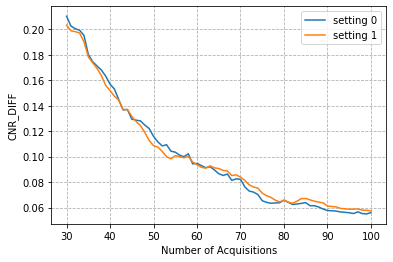

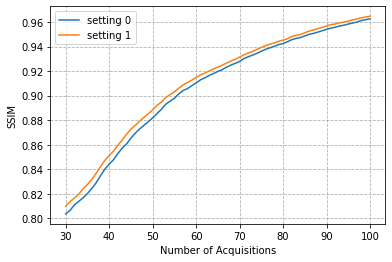

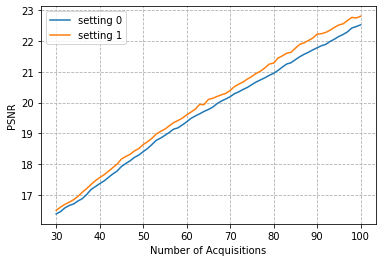

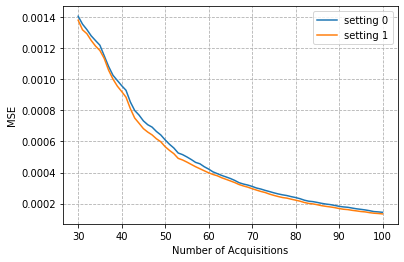

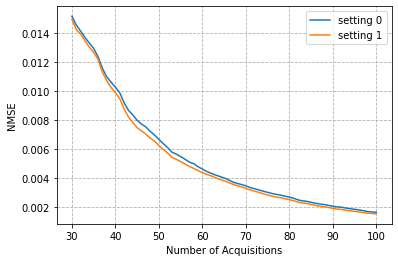

In [3]:

rec_plot('id', metric='cnr', policy='random')
rec_plot('id', metric='ssim', policy='random')
rec_plot('id', metric='psnr', policy='random')
rec_plot('id', metric='mse', policy='random')
rec_plot('id', metric='nmse', policy='random')

## Reconstruction error on OOD data

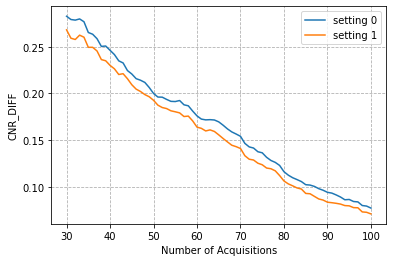

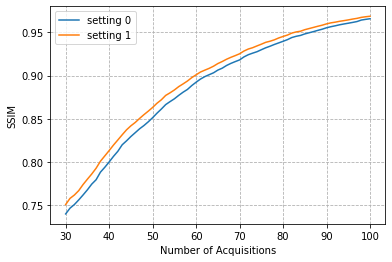

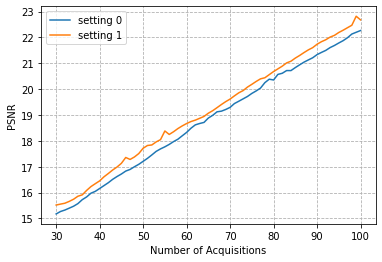

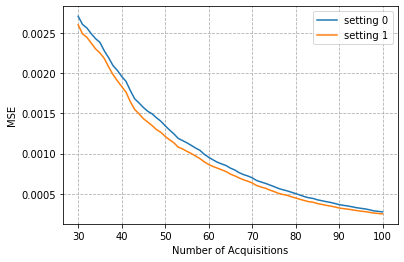

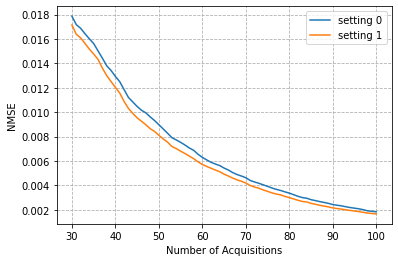

In [4]:
# Setting 0: Train on 100% ID
# Setting 1: Train on 50% ID and 50% OOD
rec_plot('ood', metric='cnr', policy='random')
rec_plot('ood', metric='ssim', policy='random')
rec_plot('ood', metric='psnr', policy='random')
rec_plot('ood', metric='mse', policy='random')
rec_plot('ood', metric='nmse', policy='random')

## Downstream Task: Lesion Segmentation
* Segmentation codebase: https://github.com/qinliuliuqin/Medical-Segmentation3d-Toolkit
* Segmentation model is trained on 800 lesion data (fully-observed)

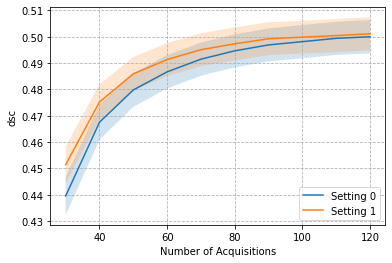

In [5]:

seg_scores_path = os.path.join(data_folder, 'seg_scores.npy')
seg_scores = np.load(seg_scores_path, allow_pickle=True).item()

scores_s0, scores_s1, scores_s2 = seg_scores['id2ood'], seg_scores['mixed2ood'], seg_scores['ood2ood']
end = 10
mean_s0, std_s0 = scores_s0['mean'][:end], scores_s0['std'][:end]
mean_s1, std_s1 = scores_s1['mean'][:end], scores_s1['std'][:end]
mean_s2, std_s2 = scores_s2['mean'][:end], scores_s2['std'][:end]

x_axis = [30 + i * 10 for i in range(end)]
plt.plot(x_axis, mean_s0, label='Setting 0')
std_ratio = 0.1
plt.fill_between(x_axis, mean_s0 - std_ratio * std_s0,
                 mean_s0 + std_ratio * std_s0, alpha=0.2)

plt.plot(x_axis, mean_s1, label='Setting 1')
plt.fill_between(x_axis, mean_s1 - std_ratio * std_s1,
                 mean_s1 + std_ratio * std_s1, alpha=0.2)

# plt.plot(x_axis, mean_s2, label='Setting 2')
# plt.fill_between(x_axis, mean_s2 - std_s2, mean_s2 + std_s2, alpha=0.2)

# plt.title('Random Policy')
plt.xlabel('Number of Acquisitions')
plt.ylabel('DSC')

plt.grid(linestyle='--')
plt.legend(loc='lower right')
plt.show()
